#1.1 Dataset  
We selected a dataset of reviews that was scraped from <a href="[url](https://cseweb.ucsd.edu/~jmcauley/datasets.html#google_restaurants)">Google Local for various restaurants.</a> The dataset includes over 87,000 reviews from approximately 30,000 users for nearly 28,000 unique businesses. Each element in this dataset contains the following fields:
```
business_id: A unique identifier for the business.  
user_id: A unique identifier for the user who wrote the review.  
rating: The rating given by the user (on a scale of 1 to 5).  
review_text: The text of the review.  
pics: A list of pictures associated with the review.  
history_reviews: A list of list of list of previous reviews written by the same user.  
```

In [37]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

with open('filter_all_t.json', 'r') as file:
    data = json.load(file)
    
# Convert to DataFrame
df = pd.json_normalize(data['train'])
print(df.head())

                business_id                user_id  rating  \
0  60567465d335d0abfb415b26  101074926318992653684       4   
1  6050fa9f5b4ccec8d5cae994  117065749986299237881       5   
2  604be10877e81aaed3cc9a1e  106700937793048450809       4   
3  60411e017cd8bf130362365a  101643045857250355161       5   
4  604139dd7cd8bf1303624208  109802745326785766951       4   

                                         review_text  \
0  The tang of the tomato sauce is outstanding. A...   
1              Chicken and waffles were really good!   
2  The appetizer of colossal shrimp was very good...   
3  The fish tacos here  omg! The salad was great ...   
4  Ribs are great, as are the mac and cheese, fri...   

                                                pics  \
0  [AF1QipM-2IRmvitARbcJr7deWfe5hyVBg_ArPMQSYvq0,...   
1     [AF1QipMpfxIZUT_aymQ3qPGO-QgGYzxbtLZGmHufAp2s]   
2  [AF1QipMNnqM5X9sSyZ9pXRZ1jvrURHN9bZhGdzuEXoP8,...   
3  [AF1QipM-a6AGGp4Hgk5RD0gY5sDRp5kEfB1hZLvlRkft,...   
4     [AF1

In [38]:
# Number of unique businesses
unique_businesses = df['business_id'].nunique()
print(f"Number of unique businesses: {unique_businesses}")

#Number of unique users
unique_users = df['user_id'].nunique()
print(f"Number of unique users: {unique_users}")

# Total number of reviews
total_reviews = df.shape[0]
print(f"Total number of reviews: {total_reviews}")

Number of unique businesses: 27896
Number of unique users: 29596
Total number of reviews: 87013


#1.2 Exploratory Data Analysis  
In our data analysis, we aim to uncover patterns and relationships within the dataset such as the distribution of ratings and the influence of review content. We will incorporate data visualization techniques such as bar charts, histograms, and word clouds to further our understanding behind possible correlations within our dataset.

In [39]:
# Rating Statistics
rating_stats = df['rating'].describe()
print("Rating Statistics:")
print(rating_stats)

Rating Statistics:
count    87013.000000
mean         4.465252
std          0.833755
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


To grasp a basic understanding of the dataset, we began by looking at the mean and standard deviation of ratings in our dataset, which from is 4.465 and 0.834 respectively. This indicates that, on average, users tend to give positive reviews to restaurants as ratings closer to 5 represent higher satisfaction. The low standard deviation informs us that the ratings are near the mean, showing that user ratings for restaurants are consistently positive, with some possible extremes. We can further see this in Figure 1, a bar graph showcasing the frequency of each rating. We have a right skewed normal distribution, where the number for 5 star ratings are significantly higher than 1, 2, and 3 star ratings.

C:\Users\Alex\AppData\Local\Temp\ipykernel_3484\3976554380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


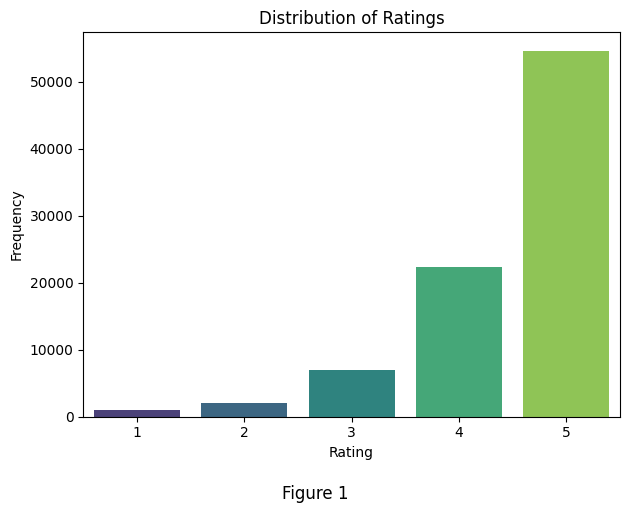

In [40]:
# Distribution of ratings
rating_counts = df['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.figtext(0.5, -0.05, 'Figure 1', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

To gain a better understanding of the content of the reviews and its sentiments, we've utilized a word cloud of the review texts that highlights the most frequently used words in Figure 2. Common words include "good," "delicious," and "burger." Words such as "delicious" and "great" appear more frequently, which are positive words that generally suggest a high satisfaction of the restaurant. This indicates that even within the reviews, users leave positive comments, which further strengthens our understanding of Figure 1 which tells us that users generally leave high ratings for a restaurant.

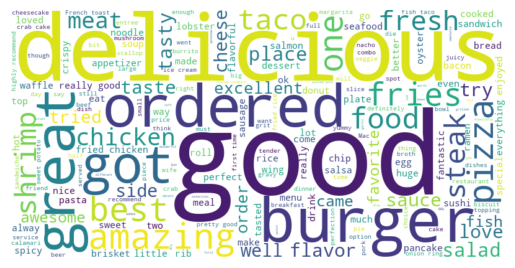

In [41]:
# Generate Word Cloud
text = " ".join(review for review in df.review_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In Figure 3, we've used another Bar Graph to represent review length by rating, and we found that there is a clear trend between the length of reviews and their ratings. Looking at the different bars, which represents the average length of reviews with the rating, lower ratings tend to have longer reviews, suggesting that users provide more detailed feedback when they are dissatisfied. Combining this with our knowledge from Figure 3, although reviews are generally longer for lower rated restaurants, the prevalence of positive words are more dominated as suggested in the Word Cloud.

C:\Users\Alex\AppData\Local\Temp\ipykernel_3484\1751248798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=avg_review_length, palette='viridis')


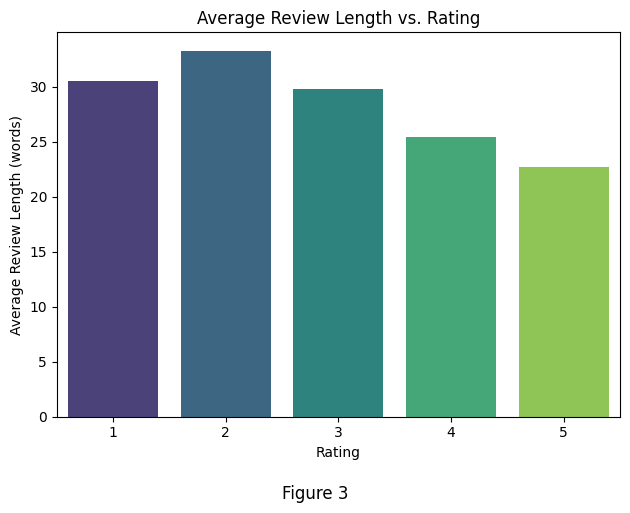

In [42]:
# Calculate the length of each review in words
df['review_length'] = df['review_text'].apply(lambda x: len(x.split()))

# Calculate the average review length for each rating
avg_review_length = df.groupby('rating')['review_length'].mean().reset_index()

sns.barplot(x='rating', y='review_length', data=avg_review_length, palette='viridis')
plt.title('Average Review Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Average Review Length (words)')
plt.figtext(0.5, -0.05, 'Figure 3', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

In observing the content of the reviews, we decided to use the TextBlob library to perform a sentiment analysis on the reviews. The TextBlob library performs sentiment analysis by calculating the polarity of the text, which ranges from -1 (very negative) to +1 (very positive). We visualized the results in Figure 4, a bar graph that showcases the frequency of positive, neutral, and negative sentiments within the reviews. The results show a higher number of positive sentiments compared to negative ones, aligning with the overall high average rating discovered from the previous Figures.

C:\Users\Alex\AppData\Local\Temp\ipykernel_3484\3870398129.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


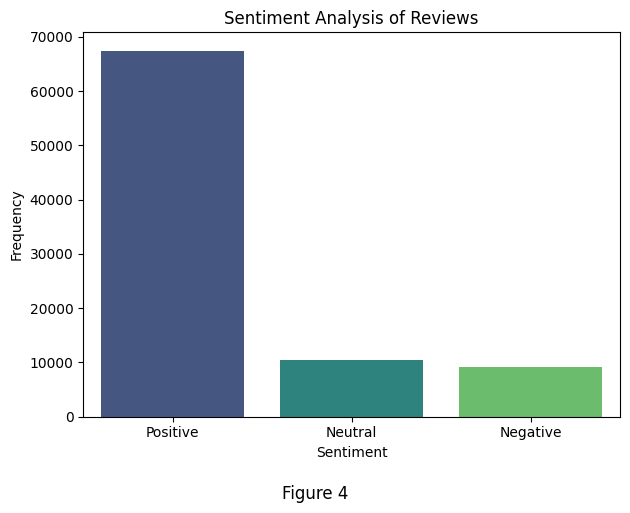

In [43]:
# Sentiment Analysis
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['review_text'].apply(get_sentiment)
sentiment_counts = df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.figtext(0.5, -0.05, 'Figure 4', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

### Summary of Findings

1. The dataset contains over 87,000 reviews from approximately 30,000 users for nearly 28,000 unique businesses.
2. The mean rating is 4.465 with a standard deviation of 0.834, indicating generally positive reviews.
3. The distribution of ratings is right-skewed, with a higher number of 5-star ratings.
4. The number of reviews per business is left-skewed, with most businesses receiving fewer than 50 reviews.
5. Lower ratings tend to have longer reviews, suggesting more detailed feedback when users are dissatisfied.
6. Positive words dominate the word cloud, aligning with the overall high average rating.
7. Sentiment analysis shows a higher number of positive sentiments compared to negative ones.

These findings will inform the design of our predictive model by highlighting the importance of review content and sentiment in predicting ratings.